In [104]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [105]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [106]:
df = pd.read_csv("../Python/Output/UncertaintyNearOne.txt", sep='\t')
df.head()

,X,Input Uncertainty,Order,Expansion Value,Expansion Uncertainty,Expansion ULP,Error Value,Error Uncertainty
0,-0.5,0.0,1,0.50000,9.064901e-17,1.110223e-16,-0.166667,1.146188e-16
1,-0.5,0.0,2,0.75000,7.166459e-17,1.110223e-16,0.083333,1.002798e-16
2,-0.5,0.0,3,0.62500,8.777065e-17,1.110223e-16,-0.041667,1.123562e-16
3,-0.5,0.0,4,0.68750,7.558828e-17,1.110223e-16,0.020833,1.031204e-16
4,-0.5,0.0,5,0.65625,8.229724e-17,1.110223e-16,-0.010417,1.081344e-16


In [107]:
df.columns

Index(['X', 'Input Uncertainty', 'Order', 'Expansion Value',
       'Expansion Uncertainty', 'Expansion ULP', 'Error Value',
       'Error Uncertainty'],
      dtype='object')

In [108]:
df['Expansion Precision'] = df['Expansion Uncertainty'] / df['Expansion Value']

In [109]:
def PlotErrorUncertainty( sX_Noise_Color=((0.6,1e-3,'b'),(0.7,1e-3,'g'),(-0.6,1e-3,'c'),(-0.7,1e-3,'m')),
                          minOrder=0, maxOrder=125, includePrecision=False):
    fig, ax = plt.subplots()
    ax.set_title(r'Taylor Expanion Reminder for $\frac{1}{1 - x}$')
    ax.set_xlabel('Taylor Expanion Order')
    ax.set_ylabel('Uncertainty or Absolute Value')
    ax.set_yscale('log')
    plt.grid(True)

    if includePrecision:
        ax2 = ax.twinx()
        ax2.set_ylabel('Value Error')
    
    for x, noise, c in sX_Noise_Color:
        dfPlot = df[(df['X']==x) & (df['Input Uncertainty']==noise) & (df['Order']>=minOrder) & (df['Order']<=maxOrder)]

        ax.plot(dfPlot['Order'], dfPlot['Expansion Uncertainty'], f'{c}--', label=f'{x}$\pm${noise} Expansion Uncertainty')
        ax.plot(dfPlot['Order'], np.abs(dfPlot['Error Value']), f'{c}-', label=f'{x}$\pm${noise} Absolute Reminder Value')
        ax.plot(dfPlot['Order'], dfPlot['Expansion ULP'], f'{c}:', label=f'{x}$\pm${noise} Expansion LSV')
        
        if includePrecision:
            ax2.plot(dfPlot['Order'], dfPlot['Expansion Precision'], f'{c}-', label=f'{x}$\pm${noise} Expansion Precision')
        
        
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    if includePrecision:
        ax2.legend(bbox_to_anchor=(1.8, 0.8))

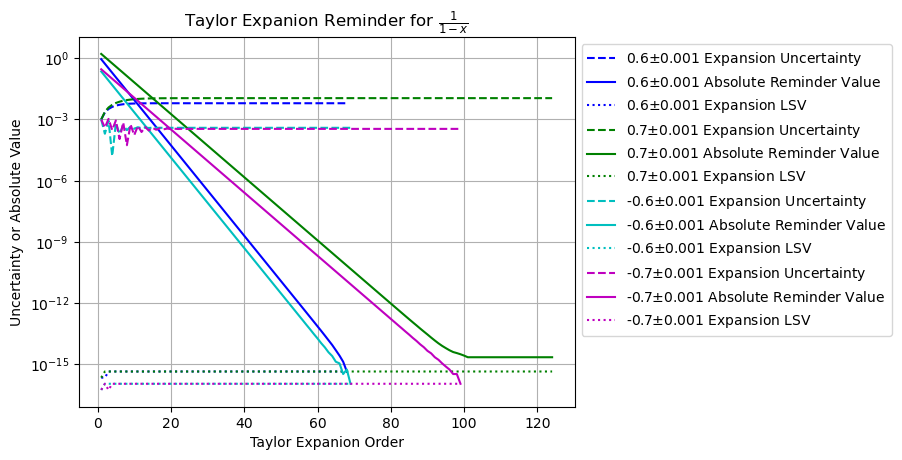

In [110]:
PlotErrorUncertainty()

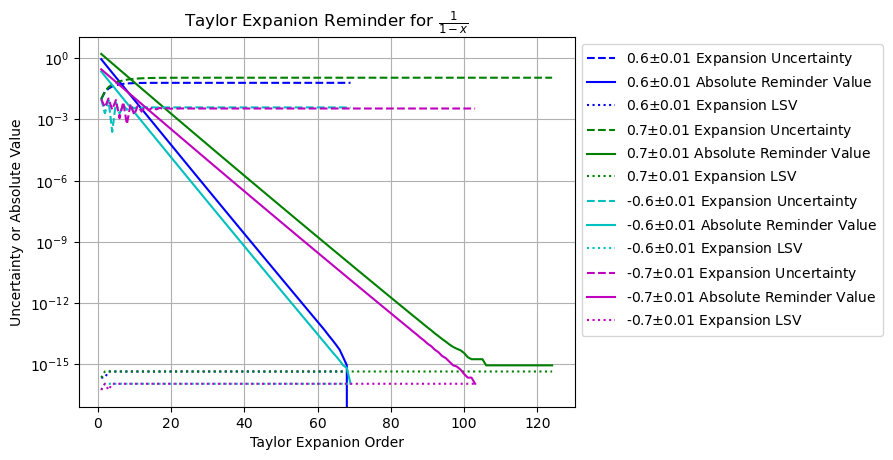

In [111]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,1e-2,'b'),(0.7,1e-2,'g'),(-0.6,1e-2,'c'),(-0.7,1e-2,'m')) )

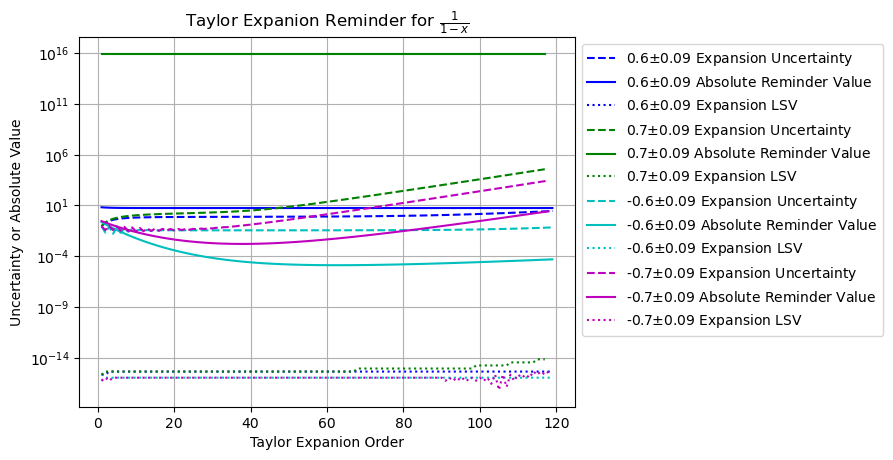

In [112]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,9e-2,'b'),(0.7,9e-2,'g'),(-0.6,9e-2,'c'),(-0.7,9e-2,'m')) )

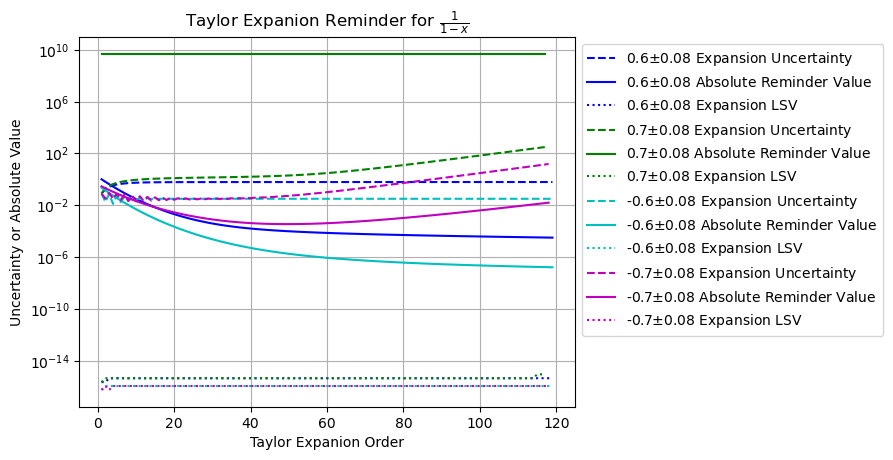

In [113]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,8e-2,'b'),(0.7,8e-2,'g'),(-0.6,8e-2,'c'),(-0.7,8e-2,'m')) )

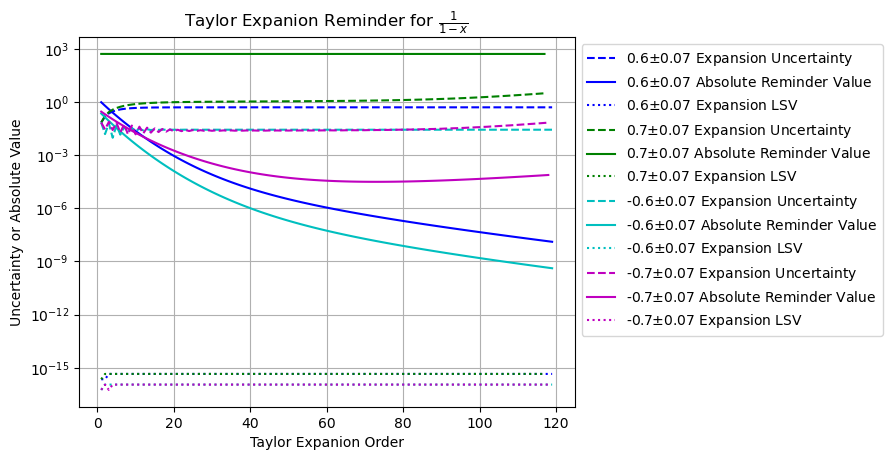

In [114]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,7e-2,'b'),(0.7,7e-2,'g'),(-0.6,7e-2,'c'),(-0.7,7e-2,'m')) )

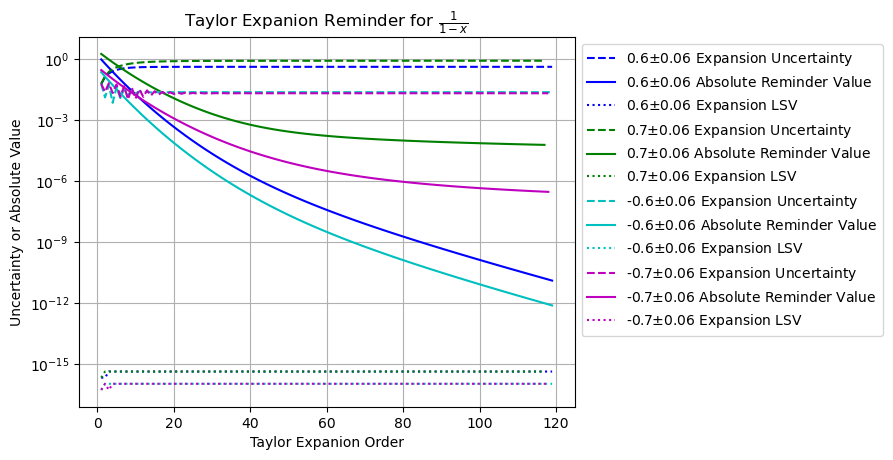

In [115]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,6e-2,'b'),(0.7,6e-2,'g'),(-0.6,6e-2,'c'),(-0.7,6e-2,'m')) )

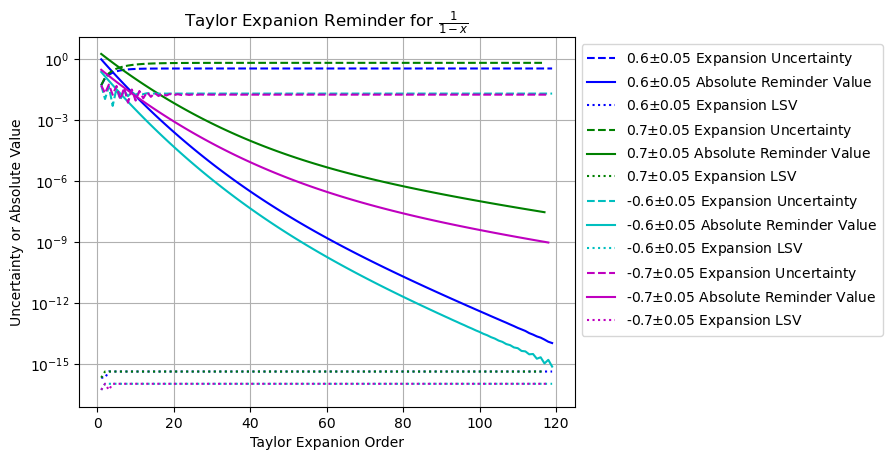

In [116]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,5e-2,'b'),(0.7,5e-2,'g'),(-0.6,5e-2,'c'),(-0.7,5e-2,'m')) )

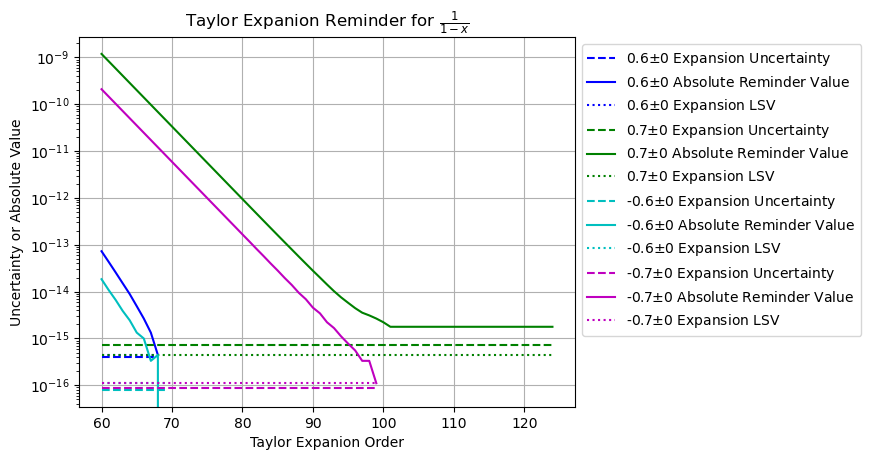

In [117]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,0,'b'),(0.7,0,'g'),(-0.6,0,'c'),(-0.7,0,'m')),
                     minOrder=60)